<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0706_40%EC%9D%BC%EC%B0%A8_%EC%A6%9D%EC%8B%9D%EB%B6%80%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show keras

Name: keras
Version: 2.8.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: tensorflow, keras-vis


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.8.2+zzzcolab20220527125636
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: flatbuffers, keras-preprocessing, absl-py, gast, opt-einsum, grpcio, wrapt, protobuf, google-pasta, h5py, six, astunparse, setuptools, tensorflow-estimator, typing-extensions, keras, tensorboard, numpy, libclang, tensorflow-io-gcs-filesystem, termcolor
Required-by: kapre


In [ ]:
!pip uninstall keras

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras/*
Proceed (y/n)? y
  Successfully uninstalled keras-2.8.0


In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [ ]:
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 2.9 MB 49.2 MB/s 
     |████████████████████████████████| 454 kB 57.6 MB/s 
     |████████████████████████████████| 3.0 MB 52.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [ ]:
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 35.5 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(3)

In [ ]:
!cp ./drive/MyDrive/train.zip ./

In [ ]:
!mkdir ./cat_dog
!mkdir cat_dog/raw_data
!unzip train.zip -d ./cat_dog/raw_data/

In [ ]:
import os
import shutil
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

np.random.seed(3)

def pre_process(base_dir):
    middle_dir = ['train','validation','test']
    dir_name = ['cats','dogs']
    for i in middle_dir:
        for j in dir_name:
            target_dir = base_dir + i+'/'+j
            os.makedirs(target_dir)
            
def data_copy(base_dir):
    file_name = base_dir + 'raw_data/'
    file_mv = base_dir
    for i in range(0,2000):
        if i < 1000:
            shutil.copy(file_name+f'cat.{i}.jpg',file_mv+"train/cats/")
            shutil.copy(file_name+f'dog.{i}.jpg',file_mv+"train/dogs/")
        elif i <1500:
            shutil.copy(file_name+f'cat.{i}.jpg',file_mv+"validation/cats/")
            shutil.copy(file_name+f'dog.{i}.jpg',file_mv+"validation/dogs/")
        else:
            shutil.copy(file_name+f'cat.{i}.jpg',file_mv+"test/cats/")
            shutil.copy(file_name+f'dog.{i}.jpg',file_mv+"test/dogs/")

In [ ]:
def read_images(base_dir):
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        base_dir + 'train',
        target_size = (150, 150),
        batch_size=20,
        class_mode='binary')
    validation_generator = validation_datagen.flow_from_directory(
        base_dir+'validation',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
    #print(train_generator.class_indices, validation_generator.class_indices)
    test_generator = test_datagen.flow_from_directory(
        base_dir + 'test',
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
    return (train_generator, validation_generator, test_generator)

In [ ]:
def build_model():
    model = Sequential()
    #conv layer
    model.add(Conv2D(32, (3,3), activation='relu', input_shape = (150, 150, 3))) #32 필터 사이즈, 3,3 커널 사이즈
    #maxpool layer
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128, (3,3), activation='relu')) 
    model.add(MaxPooling2D((2,2)))
    #flat layer
    model.add(Flatten())
    #classifier
        #Dense layer
    model.add(Dense(512, activation='relu'))

        #Dense layer
    model.add(Dense(1, activation='sigmoid'))   #고양이(0)와 강아지(1) 이진 분류하기 위해 sigmoid 함수를 사용

    #model compile
    model.compile(loss='binary_crossentropy',optimizer= optimizers.RMSprop(learning_rate=1e-4), metrics=['acc']) 
    #learning rate시 optimizer를 이렇게도 쓴다
    return model

In [ ]:
def Augmentation(base_dir):
	train_datagen = ImageDataGenerator(rescale=1./255, 
		rotation_range=40,
		width_shift_range=0.2,
    	height_shift_range=0.2,
    	shear_range=0.2,
    	zoom_range=0.2,
    	horizontal_flip=True)
	train_generator = train_datagen.flow_from_directory(
        base_dir+'train',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
	validation_datagen = ImageDataGenerator(rescale=1./255)
	validation_generator = validation_datagen.flow_from_directory(
		base_dir+'validation',
		target_size=(150, 150),
		batch_size=20, 
		class_mode='binary')
	#print(train_generator.class_indices, validation_generator.class_indices)
	return (train_generator, validation_generator)

In [ ]:
def build_augmentation_model():
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation='relu', 
                     input_shape = (150, 150, 3)))

    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(128, (3,3), activation='relu')) 
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dropout(0.5))

    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(loss='binary_crossentropy',optimizer= optimizers.RMSprop(learning_rate=1e-4), metrics=['acc']) 

    return model

In [ ]:
base_dir = './cat_dog/'

In [ ]:
pre_process(base_dir)

In [ ]:
data_copy(base_dir)

In [ ]:
(train_generator,validation_generator,test_generator) = read_images(base_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
(train_generator,validation_generator) = Augmentation(base_dir)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = build_augmentation_model()

In [ ]:
history = model.fit_generator(train_generator, 
                                steps_per_epoch=200,
                                epochs=6, 
                                validation_data= validation_generator,
                                validation_steps=50)   

Epoch 1/6
200/200 [==============================] - 35s 177ms/step - loss: 0.6910 - acc: 0.5282 - val_loss: 0.6600 - val_acc: 0.5740
Epoch 2/6
200/200 [==============================] - 31s 154ms/step - loss: 0.6758 - acc: 0.5745 - val_loss: 0.6741 - val_acc: 0.6260
Epoch 3/6
200/200 [==============================] - 31s 153ms/step - loss: 0.6590 - acc: 0.6093 - val_loss: 0.6375 - val_acc: 0.6020
Epoch 4/6
200/200 [==============================] - 31s 153ms/step - loss: 0.6304 - acc: 0.6420 - val_loss: 0.6316 - val_acc: 0.6660
Epoch 5/6
200/200 [==============================] - 31s 154ms/step - loss: 0.6088 - acc: 0.6658 - val_loss: 0.5775 - val_acc: 0.6810
Epoch 6/6
200/200 [==============================] - 32s 161ms/step - loss: 0.5881 - acc: 0.6913 - val_loss: 0.4928 - val_acc: 0.6840


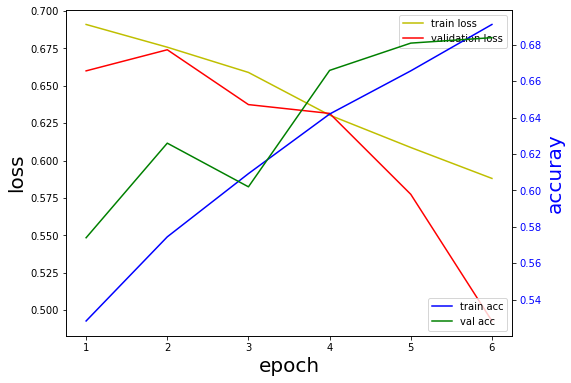

In [ ]:
from drive.MyDrive import history_plot as hp
hp.history_plot(history)

In [ ]:
print("--Evaluate--")
scores = model.evaluate_generator(test_generator, steps=50)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

--Evaluate--
acc: 69.20%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

file_name = './cat_dog/raw_data/cat.345.jpg'

img = load_img(file_name, target_size=(150,150))
x= img_to_array(img)
print(x.shape)
x= x.astype('float32')/255.0
x= np.expand_dims(x, axis=0)
print(x.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
#x 준비완료
print("--- Predict ---")
output = model.predict(x)
if output[0]>0.5:
    print('dog')
else:
    print('cat')
np.set_printoptions(formatter={'float': lambda x:"{0:0.3f}".format(x)})
print(output)

--- Predict ---
cat
[[0.222]]
